In [1]:
# Importing libraries
from importlib import reload
import time
import json

from kcenters import KCenters
from kcenter_capacitated import KCenterCapacitated
from hclust_capacitated import Hierarchical_Clustering
from hclust import Hierarchical_Capacitated
from kMedoids import kMedoids
from KMedoids_Knapsack import KMedoids_Knapsack

from utils import distance, balance_calculation, plot_analysis
from experiments import run_experiments_kcenter,run_experiments_kmedoids,run_experiments_hierarchical, run_experiments_kmedoids_knapsack
from data_loader import DataLoader
from fairlet_decomposition import VanillaFairletDecomposition, MCFFairletDecomposition

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

## Data Load

In [2]:
source = 'oulad'
normalize = True
degrees = 20 #number of cluster
decay_lambda = 0.3 #decay parameter

with open('config.json') as json_file:
    config = json.load(json_file)
    
dl = DataLoader(source=source, fair_column=config[source]['fair_column'],
               fair_values=config[source]['fair_values'], distance_columns=config[source]['distance_columns'])

dl.load(normalize)
blues,reds = dl.split(split_size=tuple(config[source]['split_size']), random_state=config[source]['random_state'])


Distribution of 'gender' column -  [('M', 16844), ('F', 13529)]

Using these features in addition to gender for clustering -  ['num_of_prev_attempts', 'studied_credits', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45']

Encoding M as 1, and F as 0.

Normalizing the data.


In [3]:
print(len(blues))
print(len(reds))

2000
2000


## k-Centers

#### k-Centers Warmup

[6.0, 3.1622776601683795, 2.23606797749979]


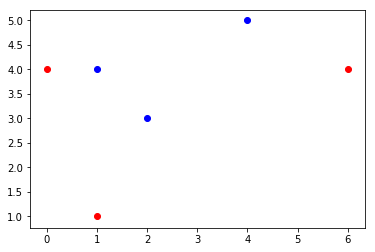

In [4]:
p = [[2, 3], [4, 5], [1,1], [0, 4], [6, 4], [1, 4]]
kcenters = KCenters(k=3)
kcenters.fit(p)
mapping = kcenters.assign()

for idx, i in enumerate(p):
    colour = 'blue'
    if idx in kcenters.centers:
        colour = 'red'
    plt.scatter(i[0], i[1], color=colour)
print(kcenters.costs)
plt.show()

### Hierarchical capacitated clustering

Mapping [(0, 0), (1, 1), (2, 0), (3, 4), (4, 4), (5, 0), (6, 1), (7, 4), (8, 1)]
Cost: [1.0, 2.0, 4.47213595499958]


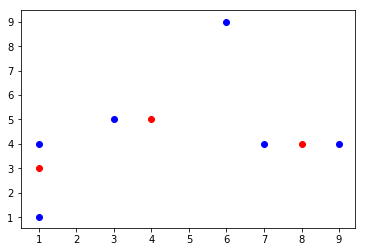

In [5]:
p = [[1, 3], [4, 5], [1,1], [9, 4], [8, 4], [1, 4],[3,5],[7,4],[6,9]]
weights = []
for i in range(len(p)):
    weights.append(2)
hclust = Hierarchical_Clustering(k=3)
hclust.fit(p,6,weights,'centroid')
mapping = hclust.assign()
print("Mapping", mapping)
for idx, i in enumerate(p):
    colour = 'blue'
    if idx in hclust.centers:
        colour = 'red'
    plt.scatter(i[0], i[1], color=colour)
print("Cost:", hclust.costs)
plt.show()

In [6]:
#weights = []
#for i in range(len(dl.data_list)):
#    weights.append(2)
#for k in range(8, 9):
#    hclust = Hierarchical_Clustering(k)
#    capacity = int((len(dl.data_list)*2*1.2)/k)
#    hclust.fit(dl.data_list,capacity,weights,'average')
#    mapping = hclust.assign()
    #print("Mapping: ", mapping)

### K-Medoids clustering

Mapping [(0, 0), (1, 0), (2, 0), (3, 3), (4, 3), (5, 0), (6, 0), (7, 3), (8, 8)]
Cost: [3.0, 9.43397840021018, 0.0]


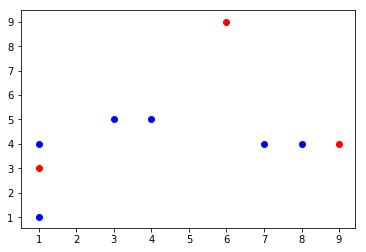

In [7]:
p = [[1, 3], [4, 5], [1,1], [9, 4], [8, 4], [1, 4],[3,5],[7,4],[6,9]]
kmedoid = kMedoids(n_cluster=3)
kmedoid.fit(p)
mapping = kmedoid.assign()
print("Mapping", mapping)
for idx, i in enumerate(p):
    colour = 'blue'
    if idx in kmedoid.medoids:
        colour = 'red'
    plt.scatter(i[0], i[1], color=colour)
print("Cost:", kmedoid.costs)
plt.show()

### K-Medoids knapsack capacitated clustering

Mapping [(0, 0), (1, 8), (2, 0), (3, 4), (4, 4), (5, 0), (6, 8), (7, 4), (8, 8)]
Cost: [9.47213595499958, 3.0, 2.0]


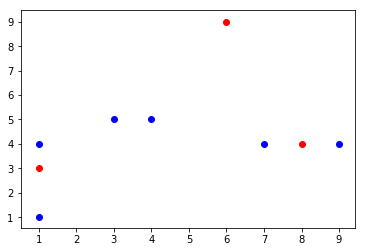

In [8]:
p = [[1, 3], [4, 5], [1,1], [9, 4], [8, 4], [1, 4],[3,5],[7,4],[6,9]]
weights = []
for i in range(len(p)):
    weights.append(2)
kmedoid_Knapsack = KMedoids_Knapsack(k=3)
kmedoid_Knapsack.fit(p,6,weights)
mapping = kmedoid_Knapsack.assign()
print("Mapping", mapping)
for idx, i in enumerate(p):
    colour = 'blue'
    if idx in kmedoid_Knapsack.medoids:
        colour = 'red'
    plt.scatter(i[0], i[1], color=colour)
print("Cost:", kmedoid_Knapsack.costs)
plt.show()

### k-Medoids on the dataset

Time taken for Degree 3 - 3.435 seconds.
Time taken for Degree 4 - 31.169 seconds.
Time taken for Degree 5 - 32.722 seconds.
Time taken for Degree 6 - 80.589 seconds.
Time taken for Degree 7 - 37.207 seconds.
Time taken for Degree 8 - 25.181 seconds.
Time taken for Degree 9 - 31.338 seconds.
Time taken for Degree 10 - 31.770 seconds.
Time taken for Degree 11 - 23.245 seconds.
Time taken for Degree 12 - 28.054 seconds.
Time taken for Degree 13 - 28.817 seconds.
Time taken for Degree 14 - 25.608 seconds.
Time taken for Degree 15 - 24.775 seconds.
Time taken for Degree 16 - 24.286 seconds.
Time taken for Degree 17 - 26.892 seconds.
Time taken for Degree 18 - 22.561 seconds.
Time taken for Degree 19 - 25.717 seconds.
Time taken for Degree 20 - 23.209 seconds.


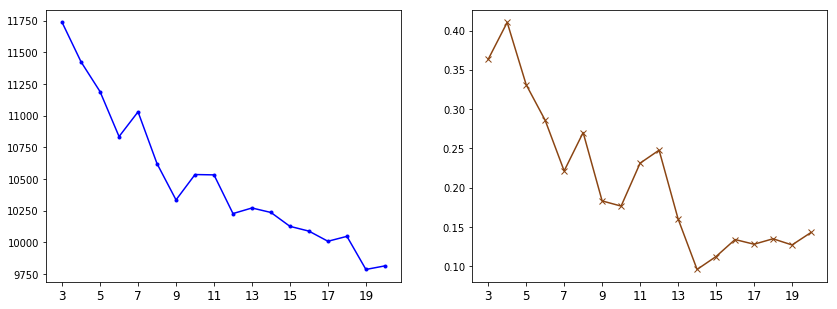

In [11]:
kmedoid_degrees = []
kmedoid_costs = []
kmedoid_balances = []
kmedoid_capacities = []

for degree in range(3, degrees+1,1):
    start_time = time.time()
    kmedoid = kMedoids(n_cluster=degree)
    kmedoid.fit(dl.data_list)
    mapping = kmedoid.assign()
    kmedoid_degrees.append(degree)
    kmedoid_costs.append(sum(kmedoid.costs))
    balance,cap = balance_calculation(dl.data_list, kmedoid.medoids, mapping)
    #unfair_balances.append(balance_calculation(dl.data_list, kcenters.centers, mapping))
    kmedoid_balances.append(balance)
    kmedoid_capacities.append(cap)
    print("Time taken for Degree %d - %.3f seconds."%(degree, time.time() - start_time))

plot_analysis(kmedoid_degrees, kmedoid_costs, kmedoid_balances, step_size=2)

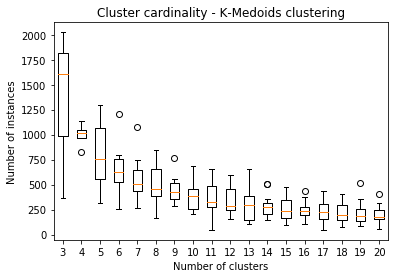

In [12]:
plt.ylabel("Number of instances")
plt.xlabel("Number of clusters")
plt.title("Cluster cardinality - K-Medoids clustering")
xtrue=np.array([i for i in range(1,19)])
xvalue=np.array([i for i in range(3,21)])
plt.boxplot(kmedoid_capacities)
plt.xticks(xtrue,xvalue)
plt.savefig('kMedoids-oulad.pdf')

### K-Centers on the dataset

In [ ]:
unfair_degrees = []
unfair_costs = []
unfair_balances = []
unfair_capacities = []

for degree in range(3, degrees+1,1):
    start_time = time.time()
    kcenters = KCenters(k=degree)
    kcenters.fit(dl.data_list)
    mapping = kcenters.assign()
    unfair_degrees.append(degree)
    cost = []
    for j in kcenters.centers:
        cluster = []
        for (x, y) in mapping:
            if (y == j):
                cluster.append(x)
        cost.append(sum([distance(dl.data_list[j], dl.data_list[i]) for i in cluster]))
    #unfair_costs.append(kcenters.costs[-1]) #max-min-max
    unfair_costs.append(sum(cost)) #sum-sum
    balance,cap = balance_calculation(dl.data_list, kcenters.centers, mapping)
    #unfair_balances.append(balance_calculation(dl.data_list, kcenters.centers, mapping))
    unfair_balances.append(balance)
    unfair_capacities.append(cap)
    print("Time taken for Degree %d - %.3f seconds."%(degree, time.time() - start_time))

plot_analysis(unfair_degrees, unfair_costs, unfair_balances, step_size=2)

In [ ]:
plt.ylabel("Number of instances")
plt.xlabel("Number of clusters")
plt.title("Cluster cardinality - K-Center clustering")
xtrue=np.array([i for i in range(1,19)])
xvalue=np.array([i for i in range(3,21)])
plt.boxplot(unfair_capacities)
plt.xticks(xtrue,xvalue)
plt.savefig('kCenter-oulad.pdf')

### Hierarchical on the dataset

In [ ]:
hclust_degrees = []
hclust_costs = []
hclust_balances = []
hclust_capacities = []
hclust_ideal_capacity = []

for degree in range(3, degrees+1,1):
    start_time = time.time()
    print("k=",degree)
    capacity = int(len(dl.data_list)*1.2/degree)
    hclust_ideal_capacity.append(capacity)
    hclust = Hierarchical_Capacitated(k=degree)
    hclust.fit(dl.data_list,capacity,'centroid')
    mapping = hclust.assign()
    hclust_degrees.append(degree)
    hclust_costs.append(sum(hclust.costs))
    balance,cap = balance_calculation(dl.data_list, hclust.centers, mapping)
    #unfair_balances.append(balance_calculation(dl.data_list, kcenters.centers, mapping))
    hclust_balances.append(balance)
    hclust_capacities.append(cap)
    print("Time taken for Degree %d - %.3f seconds."%(degree, time.time() - start_time))

plot_analysis(hclust_degrees, hclust_costs, hclust_balances, step_size=2)

k= 3
Time taken for Degree 3 - 18549.603 seconds.
k= 4
Time taken for Degree 4 - 11475.685 seconds.
k= 5
Time taken for Degree 5 - 11373.669 seconds.
k= 6
Time taken for Degree 6 - 12526.899 seconds.
k= 7


In [ ]:
plt.ylabel("Number of instances")
plt.xlabel("Number of clusters")
plt.title("Cluster cardinality - Hierarchical clustering")
xtrue=np.array([i for i in range(1,19)])
xvalue=np.array([i for i in range(3,21)])
plt.boxplot(hclust_capacities)
plt.xticks(xtrue,xvalue)
plt.savefig('hclust-oulad.pdf')

### Vanilla Fairlet Decomposition

Len of data:  4000
Time taken for Degree 3 - 7.480 seconds.
Time taken for Degree 4 - 17.976 seconds.
Time taken for Degree 5 - 10.309 seconds.
Time taken for Degree 6 - 9.965 seconds.
Time taken for Degree 7 - 7.245 seconds.
Time taken for Degree 8 - 8.393 seconds.
Time taken for Degree 9 - 15.198 seconds.
Time taken for Degree 10 - 16.395 seconds.
Time taken for Degree 11 - 8.549 seconds.
Time taken for Degree 12 - 8.604 seconds.
Time taken for Degree 13 - 10.799 seconds.
Time taken for Degree 14 - 15.615 seconds.
Time taken for Degree 15 - 8.822 seconds.
Time taken for Degree 16 - 8.101 seconds.
Time taken for Degree 17 - 8.801 seconds.
Time taken for Degree 18 - 9.365 seconds.
Time taken for Degree 19 - 9.950 seconds.
Time taken for Degree 20 - 11.230 seconds.


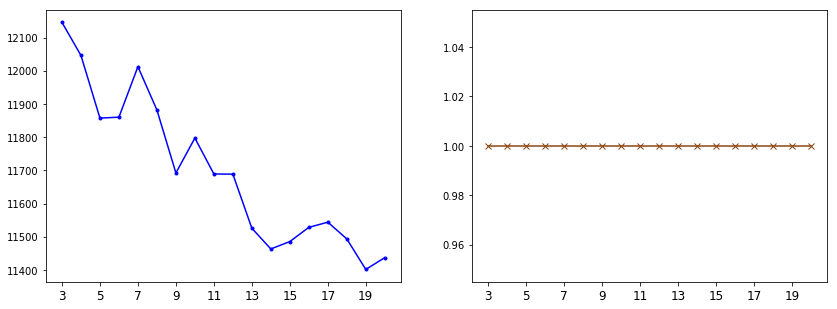

In [13]:
# Instantiating the Vanilla Decomposition per Lemma 3 in NeurIPS 2017 Paper
#vfd = VanillaFairletDecomposition(1, 2, blues, reds, dl.data_list)

# Decomposing for fairlets and performing traditional clustering
#vanilla_fairlets, vanilla_fairlet_centers, vanilla_fairlet_costs = vfd.decompose()

#Only run below codes when having the fairlets
vanilla_degrees, vanilla_costs, vanilla_balances, vanilla_capacities = run_experiments_kmedoids(degrees, dl.data_list, vanilla_fairlets,
                                                                  vanilla_fairlet_centers)
plot_analysis(vanilla_degrees, vanilla_costs, vanilla_balances, step_size=2)

Len of data:  4000
Time taken for Degree 3 - 0.515 seconds.
Time taken for Degree 4 - 0.549 seconds.
Time taken for Degree 5 - 0.738 seconds.
Time taken for Degree 6 - 1.152 seconds.
Time taken for Degree 7 - 1.347 seconds.
Time taken for Degree 8 - 1.513 seconds.
Time taken for Degree 9 - 1.867 seconds.
Time taken for Degree 10 - 2.290 seconds.
Time taken for Degree 11 - 3.109 seconds.
Time taken for Degree 12 - 3.306 seconds.
Time taken for Degree 13 - 3.761 seconds.
Time taken for Degree 14 - 4.275 seconds.
Time taken for Degree 15 - 4.972 seconds.
Time taken for Degree 16 - 5.616 seconds.
Time taken for Degree 17 - 6.523 seconds.
Time taken for Degree 18 - 6.891 seconds.
Time taken for Degree 19 - 7.585 seconds.
Time taken for Degree 20 - 8.619 seconds.


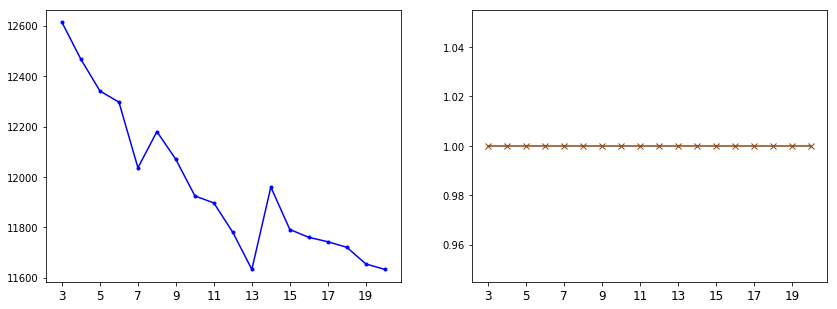

In [8]:
vanilla_degrees, vanilla_costs, vanilla_balances, vanilla_capacities = run_experiments_kcenter(degrees, dl.data_list, vanilla_fairlets,
                                                                  vanilla_fairlet_centers)
plot_analysis(vanilla_degrees, vanilla_costs, vanilla_balances, step_size=2)

In [ ]:
#Save to files vanilla fairlets
df = pd.DataFrame(vanilla_fairlets)
df.to_csv('vanilla-fairlets-oulad.csv',index=False)
#Vanilla centers and costs
df = pd.DataFrame(list(zip(vanilla_fairlet_centers,vanilla_fairlet_costs)), 
               columns =['Vanilla Fairlet Centers','Vanilla Fairlet Costs'])
df.to_csv('vanilla-fairlets-centers-costs-oulad.csv',index=False)

In [4]:
#Read fairlets from files
import math

df=pd.read_csv("vanilla-fairlets-oulad.csv",na_filter=True,header=0)
x=df.values
vanilla_fairlets=[]
for row in x:
    temp=[]
    for i in row:
        t=float(i)
        if math.isnan(t)==False:
            temp.append(int(i))
    vanilla_fairlets.append(temp)
    
#Read fairlet centers and costs from files
df=pd.read_csv('vanilla-fairlets-centers-costs-oulad.csv')
vanilla_fairlet_centers = list(df['Vanilla Fairlet Centers'].values)
vanilla_fairlet_costs = list(df['Vanilla Fairlet Costs'].values)

In [14]:
import pandas as pd
len_fairlet=[]
for fairlet in vanilla_fairlets:
    len_fairlet.append(len(fairlet))   
num_fairlets = pd.DataFrame({'capacity': len_fairlet})
num_fairlets["capacity"].value_counts()
#print("Number of fairlet: ", len(vanilla_fairlets))

2    2000
Name: capacity, dtype: int64

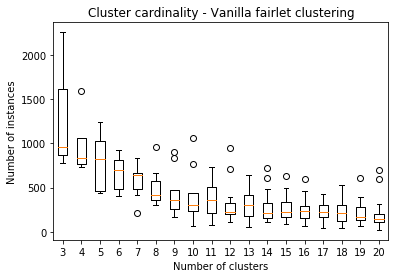

In [15]:
plt.ylabel("Number of instances")
plt.xlabel("Number of clusters")
plt.title("Cluster cardinality - Vanilla fairlet clustering")
xtrue=np.array([i for i in range(1,19)])
xvalue=np.array([i for i in range(3,21)])
plt.boxplot(vanilla_capacities)
plt.xticks(xtrue,xvalue)
plt.savefig('Vanilla-oulad.pdf')

### Vanilla Fairlet Decomposition - Hierarchical capacitated clustering

Degree:  3
Capacity: 1600
Time taken for Degree 3 - 2414.572 seconds.
Degree:  4
Capacity: 1200
Time taken for Degree 4 - 1985.069 seconds.
Degree:  5
Capacity: 960
Time taken for Degree 5 - 1933.585 seconds.
Degree:  6
Capacity: 800
Time taken for Degree 6 - 2105.747 seconds.
Degree:  7
Capacity: 685
Time taken for Degree 7 - 1974.149 seconds.
Degree:  8
Capacity: 600
Time taken for Degree 8 - 1868.830 seconds.
Degree:  9
Capacity: 533
Time taken for Degree 9 - 1522.717 seconds.
Degree:  10
Capacity: 480
Time taken for Degree 10 - 1566.823 seconds.
Degree:  11
Capacity: 436
Time taken for Degree 11 - 1457.974 seconds.
Degree:  12
Capacity: 400
Time taken for Degree 12 - 1483.501 seconds.
Degree:  13
Capacity: 369
Time taken for Degree 13 - 1532.585 seconds.
Degree:  14
Capacity: 342
Time taken for Degree 14 - 1370.481 seconds.
Degree:  15
Capacity: 320
Time taken for Degree 15 - 1144.221 seconds.
Degree:  16
Capacity: 300
Time taken for Degree 16 - 1189.299 seconds.
Degree:  17
Capaci

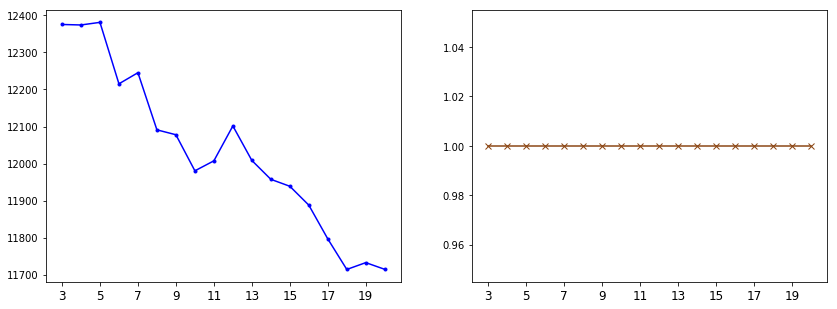

In [16]:
#Run again, only in neccessary case
#vfd = VanillaFairletDecomposition(1, 2, blues, reds, dl.data_list)

# Decomposing for fairlets and performing traditional clustering
#vanilla_fairlets, vanilla_fairlet_centers, vanilla_fairlet_costs = vfd.decompose()
weight_vanilla_fairlets = [len(vanilla_fairlets[i]) for i in range(len(vanilla_fairlets))]
vanilla_degrees_hierarchical, vanilla_costs_hierarchical, vanilla_balances_hierarchical, vanilla_capacitated_capacities, vanilla_ideal_capacity = run_experiments_hierarchical(degrees, dl.data_list, vanilla_fairlets,
                                                                  vanilla_fairlet_centers,weight_vanilla_fairlets)
plot_analysis(vanilla_degrees_hierarchical, vanilla_costs_hierarchical, vanilla_balances_hierarchical, step_size=2)

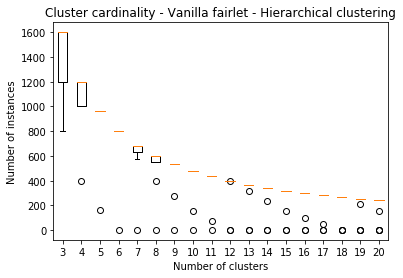

In [17]:
plt.ylabel("Number of instances")
plt.xlabel("Number of clusters")
plt.title("Cluster cardinality - Vanilla fairlet - Hierarchical clustering")
xtrue=np.array([i for i in range(1,19)])
xvalue=np.array([i for i in range(3,21)])
plt.boxplot(vanilla_capacitated_capacities)
plt.xticks(xtrue,xvalue)
plt.savefig('Vanilla_Hierarchical-oulad.pdf')

In [18]:
vanilla_ideal_capacity

[1600,
 1200,
 960,
 800,
 685,
 600,
 533,
 480,
 436,
 400,
 369,
 342,
 320,
 300,
 282,
 266,
 252,
 240]

### Vanilla Fairlet Decomposition - kMedoids knapsack clustering

Time taken for Degree 3 - 33.611 seconds.
Time taken for Degree 4 - 28.425 seconds.
Time taken for Degree 5 - 58.116 seconds.
Time taken for Degree 6 - 25.499 seconds.
Time taken for Degree 7 - 54.116 seconds.
Time taken for Degree 8 - 49.238 seconds.
Time taken for Degree 9 - 72.413 seconds.
Time taken for Degree 10 - 46.345 seconds.
Time taken for Degree 11 - 46.023 seconds.
Time taken for Degree 12 - 46.822 seconds.
Time taken for Degree 13 - 67.120 seconds.
Time taken for Degree 14 - 65.985 seconds.
Time taken for Degree 15 - 64.568 seconds.
Time taken for Degree 16 - 64.542 seconds.
Time taken for Degree 17 - 43.974 seconds.
Time taken for Degree 18 - 44.509 seconds.
Time taken for Degree 19 - 44.510 seconds.
Time taken for Degree 20 - 44.749 seconds.


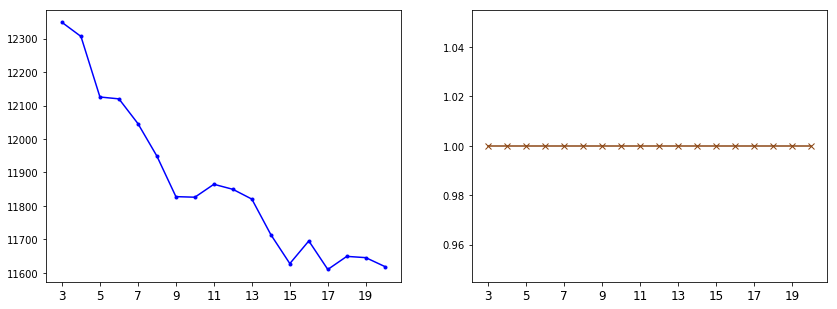

In [19]:
#Only the clustering methods
weight_vanilla_fairlets = [len(vanilla_fairlets[i]) for i in range(len(vanilla_fairlets))]
vanilla_degrees_kmedoids_knapsack, vanilla_costs_kmedoids_knapsack, vanilla_balances_kmedoids_knapsack, vanilla_kmedoids_knapsack_capacities, vanilla_kmedois_knapsack_ideal_capacity = run_experiments_kmedoids_knapsack(degrees, dl.data_list, vanilla_fairlets,
                                                                  vanilla_fairlet_centers,weight_vanilla_fairlets,20,decay_lambda)
plot_analysis(vanilla_degrees_kmedoids_knapsack, vanilla_costs_kmedoids_knapsack, vanilla_balances_kmedoids_knapsack, step_size=2)

In [ ]:
#Find the best lambda based on fairness
decay_lambda = 0.1
best_average = 0
for i in range(10):
    print("Lambda:",decay_lambda)
    weight_vanilla_fairlets = [len(vanilla_fairlets[i]) for i in range(len(vanilla_fairlets))]
    vanilla_degrees_kmedoids_knapsack, vanilla_costs_kmedoids_knapsack, vanilla_balances_kmedoids_knapsack, vanilla_kmedoids_knapsack_capacities, vanilla_kmedois_knapsack_ideal_capacity = run_experiments_kmedoids_knapsack(degrees, dl.data_list, vanilla_fairlets,
                                                                  vanilla_fairlet_centers,weight_vanilla_fairlets,20,decay_lambda)
    average = sum(vanilla_balances_kmedoids_knapsack) / len(vanilla_balances_kmedoids_knapsack) 
    print("Average balance: ",average)
    if best_average < average:
        best_average = average
        best_decay_lambda = decay_lambda
    decay_lambda += 0.1
print("The best lamda is:",best_decay_lambda)
print("The best average is:",best_average)

In [ ]:
#Find the best lambda based on clustering cost
decay_lambda = 0.1
best_average = 100000
for i in range(10):
    print("Lambda:",decay_lambda)
    weight_vanilla_fairlets = [len(vanilla_fairlets[i]) for i in range(len(vanilla_fairlets))]
    vanilla_degrees_kmedoids_knapsack, vanilla_costs_kmedoids_knapsack, vanilla_balances_kmedoids_knapsack, vanilla_kmedoids_knapsack_capacities, vanilla_kmedois_knapsack_ideal_capacity = run_experiments_kmedoids_knapsack(degrees, dl.data_list, vanilla_fairlets,
                                                                  vanilla_fairlet_centers,weight_vanilla_fairlets,20,decay_lambda)
    average = sum(vanilla_costs_kmedoids_knapsack) / len(vanilla_costs_kmedoids_knapsack) 
    print("Average balance: ",average)
    if best_average > average:
        best_average = average
        best_decay_lambda = decay_lambda
    decay_lambda += 0.1
print("The best lamda is:",best_decay_lambda)
print("The best average is:",best_average)

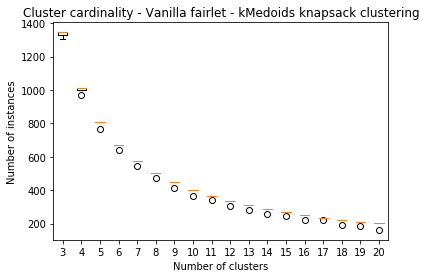

In [20]:
plt.ylabel("Number of instances")
plt.xlabel("Number of clusters")
plt.title("Cluster cardinality - Vanilla fairlet - kMedoids knapsack clustering")
xtrue=np.array([i for i in range(1,19)])
xvalue=np.array([i for i in range(3,21)])
plt.boxplot(vanilla_kmedoids_knapsack_capacities)
plt.xticks(xtrue,xvalue)
plt.savefig('Vanilla_kmedoid_knapsack_oulad.pdf')

### MCF Fairlet Decomposition

Len of data:  4000
Time taken for Degree 3 - 1.582 seconds.
Time taken for Degree 4 - 19.493 seconds.
Time taken for Degree 5 - 18.138 seconds.
Time taken for Degree 6 - 7.941 seconds.
Time taken for Degree 7 - 20.678 seconds.
Time taken for Degree 8 - 18.457 seconds.
Time taken for Degree 9 - 12.311 seconds.
Time taken for Degree 10 - 6.288 seconds.
Time taken for Degree 11 - 7.995 seconds.
Time taken for Degree 12 - 8.305 seconds.
Time taken for Degree 13 - 8.292 seconds.
Time taken for Degree 14 - 15.242 seconds.
Time taken for Degree 15 - 14.977 seconds.
Time taken for Degree 16 - 15.472 seconds.
Time taken for Degree 17 - 9.839 seconds.
Time taken for Degree 18 - 10.198 seconds.
Time taken for Degree 19 - 11.917 seconds.
Time taken for Degree 20 - 10.903 seconds.


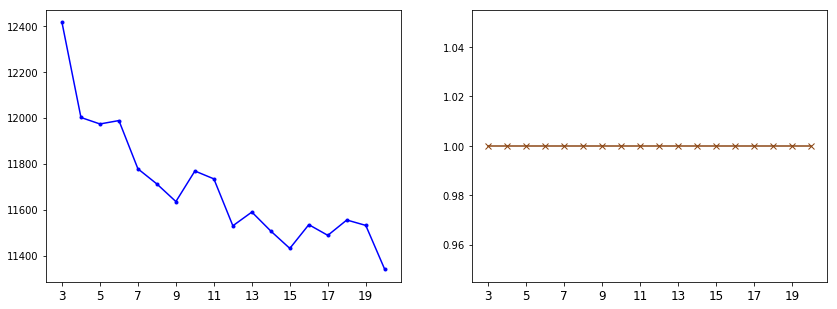

In [21]:
# Instantiating the MCF Decomposition
#mcf = MCFFairletDecomposition(blues, reds, 2, config[source]['distance_threshold'], dl.data_list)

# Computing the distance matrix between blue and red nodes
#mcf.compute_distances()

# Adding nodes and edges
#mcf.build_graph(plot_graph=True)

# Decomposing for fairlets and performing traditional clustering
#mcf_fairlets, mcf_fairlet_centers, mcf_fairlet_costs = mcf.decompose()

#If having fairlets already
mcf_degrees, mcf_costs, mcf_balances, mcf_capacities = run_experiments_kmedoids(degrees, dl.data_list, mcf_fairlets, mcf_fairlet_centers)
plot_analysis(mcf_degrees, mcf_costs, mcf_balances, step_size=2)

Len of data:  4000
Time taken for Degree 3 - 0.602 seconds.
Time taken for Degree 4 - 0.659 seconds.
Time taken for Degree 5 - 0.865 seconds.
Time taken for Degree 6 - 1.198 seconds.
Time taken for Degree 7 - 1.305 seconds.
Time taken for Degree 8 - 1.418 seconds.
Time taken for Degree 9 - 1.733 seconds.
Time taken for Degree 10 - 2.081 seconds.
Time taken for Degree 11 - 2.396 seconds.
Time taken for Degree 12 - 2.753 seconds.
Time taken for Degree 13 - 3.118 seconds.
Time taken for Degree 14 - 3.532 seconds.
Time taken for Degree 15 - 4.077 seconds.
Time taken for Degree 16 - 4.605 seconds.
Time taken for Degree 17 - 5.018 seconds.
Time taken for Degree 18 - 5.631 seconds.
Time taken for Degree 19 - 6.123 seconds.
Time taken for Degree 20 - 6.789 seconds.


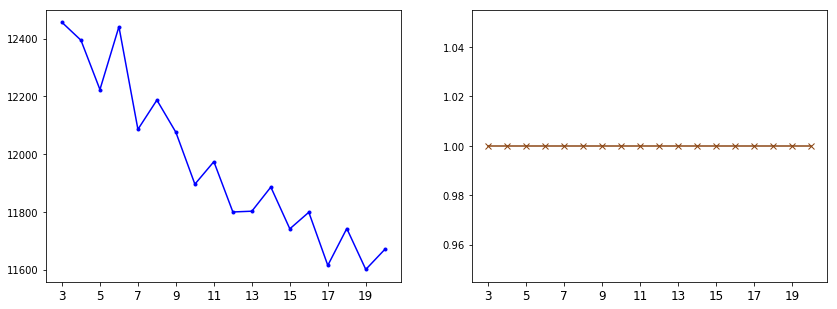

In [9]:
mcf_degrees, mcf_costs, mcf_balances, mcf_capacities = run_experiments_kcenter(degrees, dl.data_list, mcf_fairlets, mcf_fairlet_centers)
plot_analysis(mcf_degrees, mcf_costs, mcf_balances, step_size=2)

Number of fairlet:  2000


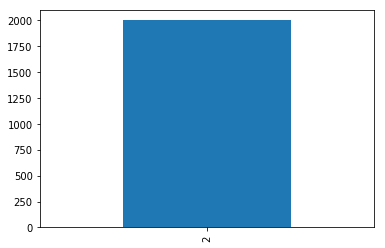

In [22]:
len_mcf_fairlet=[]
for fairlet in mcf_fairlets:
    len_mcf_fairlet.append(len(fairlet))   
num_mcf_fairlets = pd.DataFrame({'capacity': len_mcf_fairlet})
num_mcf_fairlets["capacity"].value_counts().plot(kind='bar')
print("Number of fairlet: ", len(mcf_fairlets))

In [ ]:
#Save to files mcf fairlets
df = pd.DataFrame(mcf_fairlets)
df.to_csv('MCF-fairlets-oulad.csv',index=False)
#MCF centers and costs
df = pd.DataFrame(list(zip(mcf_fairlet_centers,mcf_fairlet_costs)), 
               columns =['MCF Fairlet Centers','MCF Fairlet Costs'])
df.to_csv('MCF-fairlets-centers-costs-oulad.csv',index=False)

In [5]:
#Read fairlets from files
import math

df=pd.read_csv("MCF-fairlets-oulad.csv",na_filter=True,header=0)
x=df.values
mcf_fairlets=[]
for row in x:
    temp=[]
    for i in row:
        t=float(i)
        if math.isnan(t)==False:
            temp.append(int(i))
    mcf_fairlets.append(temp)
    
#Read fairlet centers and costs from files
df=pd.read_csv('MCF-fairlets-centers-costs-oulad.csv')
mcf_fairlet_centers = list(df['MCF Fairlet Centers'].values)
mcf_fairlet_costs = list(df['MCF Fairlet Costs'].values)

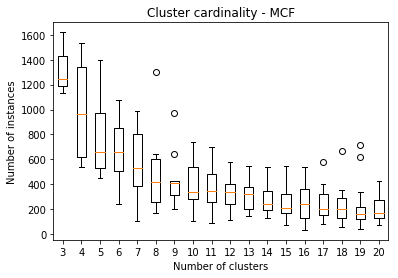

In [23]:
plt.ylabel("Number of instances")
plt.xlabel("Number of clusters")
plt.title("Cluster cardinality - MCF")
xtrue=np.array([i for i in range(1,19)])
xvalue=np.array([i for i in range(3,21)])
plt.boxplot(mcf_capacities)
plt.xticks(xtrue,xvalue)
plt.savefig('MCF-oulad.pdf')

### MCF Fairlet Decomposition - Hierarchical capacitated

Degree:  3
Capacity: 1600
Time taken for Degree 3 - 2545.438 seconds.
Degree:  4
Capacity: 1200
Time taken for Degree 4 - 2102.609 seconds.
Degree:  5
Capacity: 960
Time taken for Degree 5 - 2103.881 seconds.
Degree:  6
Capacity: 800
Time taken for Degree 6 - 2155.344 seconds.
Degree:  7
Capacity: 685
Time taken for Degree 7 - 1892.046 seconds.
Degree:  8
Capacity: 600
Time taken for Degree 8 - 1695.036 seconds.
Degree:  9
Capacity: 533
Time taken for Degree 9 - 1665.818 seconds.
Degree:  10
Capacity: 480
Time taken for Degree 10 - 1463.914 seconds.
Degree:  11
Capacity: 436
Time taken for Degree 11 - 1387.930 seconds.
Degree:  12
Capacity: 400
Time taken for Degree 12 - 1494.912 seconds.
Degree:  13
Capacity: 369
Time taken for Degree 13 - 1301.896 seconds.
Degree:  14
Capacity: 342
Time taken for Degree 14 - 1262.070 seconds.
Degree:  15
Capacity: 320
Time taken for Degree 15 - 1162.264 seconds.
Degree:  16
Capacity: 300
Time taken for Degree 16 - 1130.854 seconds.
Degree:  17
Capaci

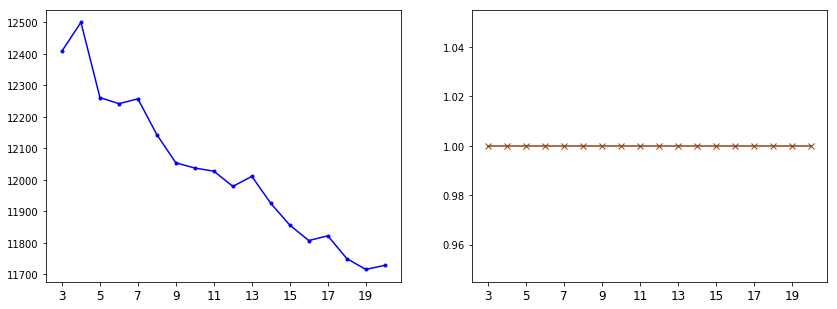

In [24]:
# Instantiating the MCF Decomposition
#mcf = MCFFairletDecomposition(blues, reds, 2, config[source]['distance_threshold'], dl.data_list)

# Computing the distance matrix between blue and red nodes
#mcf.compute_distances()

# Adding nodes and edges
#mcf.build_graph(plot_graph=True)

# Decomposing for fairlets and performing traditional clustering
#mcf_fairlets, mcf_fairlet_centers, mcf_fairlet_costs = mcf.decompose()

weight_mcf_fairlets = [len(mcf_fairlets[i]) for i in range(len(mcf_fairlets))]
mcf_degrees_hclust, mcf_costs_hclust, mcf_balances_hclust, mcf_capacitated_capacities, mcf_capacitated_ideal_capacity = run_experiments_hierarchical(degrees, dl.data_list, mcf_fairlets, mcf_fairlet_centers,weight_mcf_fairlets)
plot_analysis(mcf_degrees_hclust, mcf_costs_hclust, mcf_balances_hclust, step_size=2)

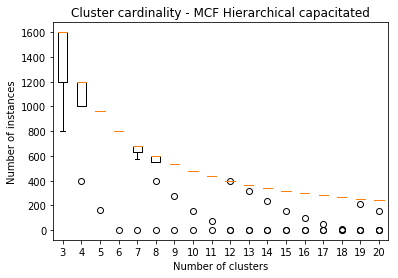

In [25]:
plt.ylabel("Number of instances")
plt.xlabel("Number of clusters")
plt.title("Cluster cardinality - MCF Hierarchical capacitated")
xtrue=np.array([i for i in range(1,19)])
xvalue=np.array([i for i in range(3,21)])
plt.boxplot(mcf_capacitated_capacities)
plt.xticks(xtrue,xvalue)
plt.savefig('MCF-Capacitated-oulad.pdf')

In [26]:
mcf_capacitated_ideal_capacity

[1600,
 1200,
 960,
 800,
 685,
 600,
 533,
 480,
 436,
 400,
 369,
 342,
 320,
 300,
 282,
 266,
 252,
 240]

### MCF Fairlet Decomposition - kMedoids knapsack clustering

In [ ]:
#Find the best lambda based on fairness
decay_lambda = 0.1
best_average = 0
for i in range(10):
    print("Lambda:",decay_lambda)
    # Decomposing for fairlets and performing traditional clustering
    weight_mcf_fairlets = [len(mcf_fairlets[i]) for i in range(len(mcf_fairlets))]
    mcf_degrees_kmedoid_knapsack, mcf_costs_kmedoid_knapsack, mcf_balances_kmedoid_knapsack, mcf_kmedoid_knapsack_capacities, mcf_kmedoid_knapsack_ideal_capacity = run_experiments_kmedoids_knapsack(degrees, dl.data_list, mcf_fairlets, mcf_fairlet_centers,weight_mcf_fairlets,10,decay_lambda)

    average = sum(mcf_balances_kmedoid_knapsack) / len(mcf_balances_kmedoid_knapsack) 
    print("Average balance: ",average)
    if best_average < average:
        best_average = average
        best_decay_lambda = decay_lambda
    decay_lambda += 0.1
print("The best lamda is:",best_decay_lambda)
print("The best average is:",best_average)

In [ ]:
#Find the best lambda based on clustering cost
decay_lambda = 0.1
best_average = 100000
for i in range(10):
    print("Lambda:",decay_lambda)
    # Decomposing for fairlets and performing traditional clustering
    weight_mcf_fairlets = [len(mcf_fairlets[i]) for i in range(len(mcf_fairlets))]
    mcf_degrees_kmedoid_knapsack, mcf_costs_kmedoid_knapsack, mcf_balances_kmedoid_knapsack, mcf_kmedoid_knapsack_capacities, mcf_kmedoid_knapsack_ideal_capacity = run_experiments_kmedoids_knapsack(degrees, dl.data_list, mcf_fairlets, mcf_fairlet_centers,weight_mcf_fairlets,10,decay_lambda)

    average = sum(mcf_costs_kmedoid_knapsack) / len(mcf_costs_kmedoid_knapsack) 
    print("Average balance: ",average)
    if best_average > average:
        best_average = average
        best_decay_lambda = decay_lambda
    decay_lambda += 0.1
print("The best lamda is:",best_decay_lambda)
print("The best average is:",best_average)

Time taken for Degree 3 - 63.595 seconds.
Time taken for Degree 4 - 22.640 seconds.
Time taken for Degree 5 - 48.848 seconds.
Time taken for Degree 6 - 95.539 seconds.
Time taken for Degree 7 - 43.638 seconds.
Time taken for Degree 8 - 42.505 seconds.
Time taken for Degree 9 - 43.806 seconds.
Time taken for Degree 10 - 43.180 seconds.
Time taken for Degree 11 - 40.131 seconds.
Time taken for Degree 12 - 38.409 seconds.
Time taken for Degree 13 - 56.950 seconds.
Time taken for Degree 14 - 39.013 seconds.
Time taken for Degree 15 - 55.929 seconds.
Time taken for Degree 16 - 72.865 seconds.
Time taken for Degree 17 - 55.547 seconds.
Time taken for Degree 18 - 55.714 seconds.
Time taken for Degree 19 - 55.015 seconds.
Time taken for Degree 20 - 55.479 seconds.


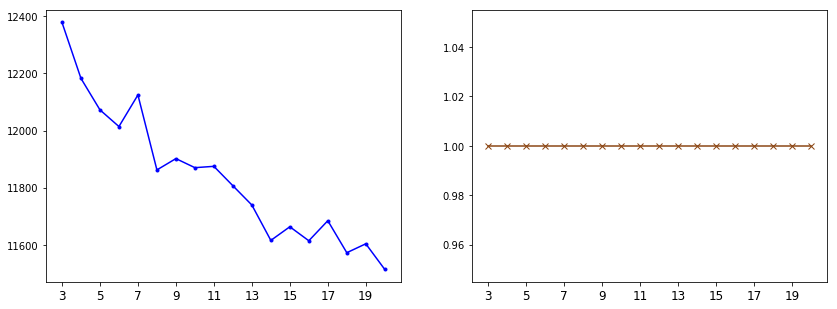

In [27]:
# Decomposing for fairlets and performing traditional clustering
weight_mcf_fairlets = [len(mcf_fairlets[i]) for i in range(len(mcf_fairlets))]
mcf_degrees_kmedoid_knapsack, mcf_costs_kmedoid_knapsack, mcf_balances_kmedoid_knapsack, mcf_kmedoid_knapsack_capacities, mcf_kmedoid_knapsack_ideal_capacity = run_experiments_kmedoids_knapsack(degrees, dl.data_list, mcf_fairlets, mcf_fairlet_centers,weight_mcf_fairlets,10,decay_lambda)
plot_analysis(mcf_degrees_kmedoid_knapsack, mcf_costs_kmedoid_knapsack, mcf_balances_kmedoid_knapsack, step_size=2)

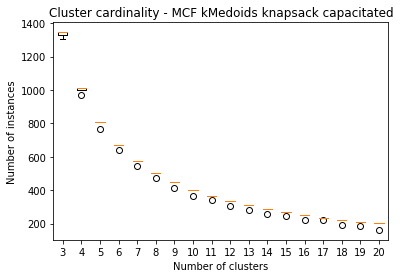

In [28]:
plt.ylabel("Number of instances")
plt.xlabel("Number of clusters")
plt.title("Cluster cardinality - MCF kMedoids knapsack capacitated")
xtrue=np.array([i for i in range(1,19)])
xvalue=np.array([i for i in range(3,21)])
plt.boxplot(mcf_kmedoid_knapsack_capacities)
plt.xticks(xtrue,xvalue)
plt.savefig('MCF-kmedoid_knapsack-oulad.pdf')

## Save results to files

In [11]:
#Clustering quality
df = pd.DataFrame(list(zip(kmedoid_costs,vanilla_costs, vanilla_costs_hierarchical,vanilla_costs_kmedoids_knapsack,mcf_costs,mcf_costs_hclust,mcf_costs_kmedoid_knapsack)), 
               columns =['k-Medoids', 'Vanilla Fairlet','Vanilla Fairlet Hierarchical Capacitated','Vanilla Fairlet k-Medoids-knapsack Capaciatated','MCF Fairlet','MCF Fairlet Hierarchical Capacitated','MCF Fairlet k-Medoids-knapsack Capacitated'])
df.to_csv('result-cost-oulad.csv',index=False)
#Clustering fairness
df = pd.DataFrame(list(zip(kmedoid_balances,vanilla_balances, vanilla_balances_hierarchical,vanilla_balances_kmedoids_knapsack,mcf_balances,mcf_balances_hclust,mcf_balances_kmedoid_knapsack)), 
               columns =['k-Medoids', 'Vanilla Fairlet','Vanilla Fairlet Hierarchical Capacitated','Vanilla Fairlet k-Medoids-knapsack Capaciatated','MCF Fairlet','MCF Fairlet Hierarchical Capacitated','MCF Fairlet k-Medoids-knapsack Capacitated'])
df.to_csv('result-balances-oulad.csv',index=False)
#Capacities
df = pd.DataFrame(kmedoid_capacities)
df.to_csv('result-capacity-kmedoid-oulad.csv',index=False)

df = pd.DataFrame(vanilla_capacities)
df.to_csv('result-capacity-vanilla-oulad.csv',index=False)

df = pd.DataFrame(vanilla_capacitated_capacities)
df.to_csv('result-capacity-vanilla-hierarchical-oulad.csv',index=False)

df = pd.DataFrame(vanilla_kmedoids_knapsack_capacities)
df.to_csv('result-capacity-vanilla-kmedoids-knapsack-oulad.csv',index=False)

df = pd.DataFrame(mcf_capacities)
df.to_csv('result-capacity-mcf-oulad.csv',index=False)

df = pd.DataFrame(mcf_capacitated_capacities)
df.to_csv('result-capacity-mcf-hierarchical-oulad.csv',index=False)

df = pd.DataFrame(mcf_kmedoid_knapsack_capacities)
df.to_csv('result-capacity-mcf-kmedoids-knapsack-oulad.csv',index=False)
#Maximum capacity
df = pd.DataFrame(list(zip(mcf_capacitated_ideal_capacity,mcf_kmedoid_knapsack_ideal_capacity)), 
               columns =['Maximum capacity of Hierarchical Capacitated','Maximum capacity of k-Medoid-knapsack Capacitated'])
df.to_csv('result-capacity-oulad.csv',index=False)

## Read results from files

In [3]:
#Clustering cost
df=pd.read_csv('result-cost-oulad.csv')
kmedoid_costs = list(df['k-Medoids'].values)
vanilla_costs = list(df['Vanilla Fairlet'].values)
vanilla_costs_hierarchical = list(df['Vanilla Fairlet Hierarchical Capacitated'].values)
vanilla_costs_kmedoids_knapsack = list(df['Vanilla Fairlet k-Medoids-knapsack Capaciatated'].values)
mcf_costs = list(df['MCF Fairlet'].values)
mcf_costs_hclust = list(df['MCF Fairlet Hierarchical Capacitated'].values)
mcf_costs_kmedoid_knapsack = list(df['MCF Fairlet k-Medoids-knapsack Capacitated'].values)

#Fairness
df=pd.read_csv('result-balances-oulad.csv')
kmedoid_balances = list(df['k-Medoids'].values)
vanilla_balances = list(df['Vanilla Fairlet'].values)
vanilla_balances_hierarchical = list(df['Vanilla Fairlet Hierarchical Capacitated'].values)
vanilla_balances_kmedoids_knapsack = list(df['Vanilla Fairlet k-Medoids-knapsack Capaciatated'].values)
mcf_balances = list(df['MCF Fairlet'].values)
mcf_balances_hclust = list(df['MCF Fairlet Hierarchical Capacitated'].values)
mcf_balances_kmedoid_knapsack = list(df['MCF Fairlet k-Medoids-knapsack Capacitated'].values)

#Cardinality
import math
#kcenter
df=pd.read_csv("result-capacity-kmedoid-oulad.csv",na_filter=True,header=0)
x=df.values
kmedoid_capacities=[]
for row in x:
    temp=[]
    for i in row:
        t= float(i)
        if math.isnan(t)==False:
            temp.append(i)
    kmedoid_capacities.append(temp)

#vanilla fairlets
df=pd.read_csv("result-capacity-vanilla-oulad.csv",na_filter=True,header=0)
x=df.values
vanilla_capacities=[]
for row in x:
    temp=[]
    for i in row:
        t= float(i)
        if math.isnan(t)==False:
            temp.append(i)
    vanilla_capacities.append(temp)

#vanilla hierarchical
df=pd.read_csv("result-capacity-vanilla-hierarchical-oulad.csv",na_filter=True,header=0)
x=df.values
vanilla_capacitated_capacities=[]
for row in x:
    temp=[]
    for i in row:
        t= float(i)
        if math.isnan(t)==False:
            temp.append(i)
    vanilla_capacitated_capacities.append(temp)
    
#vanilla kmedoids-knapsack
df=pd.read_csv("result-capacity-vanilla-kmedoids-knapsack-oulad.csv",na_filter=True,header=0)
x=df.values
vanilla_kmedoids_knapsack_capacities=[]
for row in x:
    temp=[]
    for i in row:
        t= float(i)
        if math.isnan(t)==False:
            temp.append(i)
    vanilla_kmedoids_knapsack_capacities.append(temp)
    
#mcf
df=pd.read_csv("result-capacity-mcf-oulad.csv",na_filter=True,header=0)
x=df.values
mcf_capacities=[]
for row in x:
    temp=[]
    for i in row:
        t= float(i)
        if math.isnan(t)==False:
            temp.append(i)
    mcf_capacities.append(temp)
    
#mcf hierarchical
df=pd.read_csv("result-capacity-mcf-hierarchical-oulad.csv",na_filter=True,header=0)
x=df.values
mcf_capacitated_capacities=[]
for row in x:
    temp=[]
    for i in row:
        t= float(i)
        if math.isnan(t)==False:
            temp.append(i)
    mcf_capacitated_capacities.append(temp)
    
#mcf kmedoids-knapsack
df=pd.read_csv("result-capacity-mcf-kmedoids-knapsack-oulad.csv",na_filter=True,header=0)
x=df.values
mcf_kmedoid_knapsack_capacities=[]
for row in x:
    temp=[]
    for i in row:
        t= float(i)
        if math.isnan(t)==False:
            temp.append(i)
    mcf_kmedoid_knapsack_capacities.append(temp)

#Maximum capacities
df=pd.read_csv("result-capacity-oulad.csv",na_filter=True,header=0)
mcf_capacitated_ideal_capacity = list(df['Maximum capacity of Hierarchical Capacitated'].values)
mcf_kmedoid_knapsack_ideal_capacity = list(df['Maximum capacity of k-Medoid-knapsack Capacitated'].values)



## Final Comparison Plot

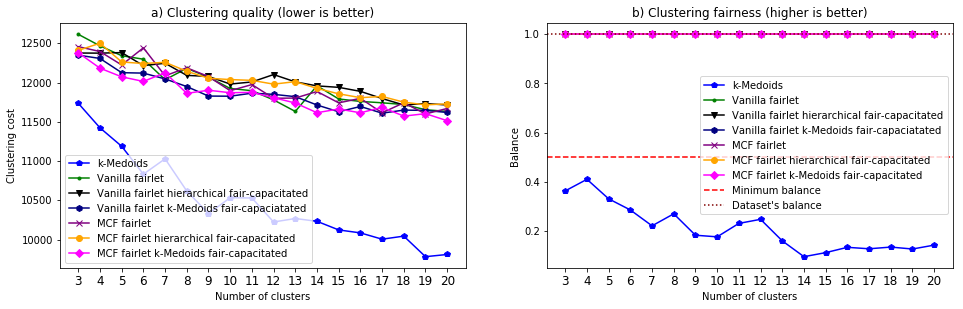

In [10]:
unfair_degrees = [i for i in range(3, degrees+1)]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 4.5))
#ax[0].plot(unfair_costs, marker='s', color='blue', label="k-Center")
ax[0].plot(kmedoid_costs, marker='p', color='blue', label="k-Medoids")
ax[0].plot(vanilla_costs, marker='.', color='green', label="Vanilla fairlet")
ax[0].plot(vanilla_costs_hierarchical, marker='v', color='black', label="Vanilla fairlet hierarchical fair-capacitated")
ax[0].plot(vanilla_costs_kmedoids_knapsack, marker='h', color='navy', label="Vanilla fairlet k-Medoids fair-capaciatated")
ax[0].plot(mcf_costs, marker='x', color='purple', label="MCF fairlet")
ax[0].plot(mcf_costs_hclust, marker='o', color='orange', label="MCF fairlet hierarchical fair-capacitated")
ax[0].plot(mcf_costs_kmedoid_knapsack, marker='D', color='fuchsia', label="MCF fairlet k-Medoids fair-capacitated")
ax[0].set_xticks(list(range(0, len(unfair_degrees), 1))) 
ax[0].set_xticklabels(list(range(min(unfair_degrees), max(unfair_degrees)+1, 1)), fontsize=12)
ax[0].set_title("a) Clustering quality (lower is better)")
ax[0].set_xlabel("Number of clusters")
ax[0].set_ylabel("Clustering cost")
ax[0].legend()
#ax[1].plot(unfair_balances, marker='s', color='blue', label="k-Center")
ax[1].plot(kmedoid_balances, marker='p', color='blue', label="k-Medoids")
ax[1].plot(vanilla_balances, marker='.', color='green', label="Vanilla fairlet")
ax[1].plot(vanilla_balances_hierarchical, marker='v', color='black', label="Vanilla fairlet hierarchical fair-capacitated")
ax[1].plot(vanilla_balances_kmedoids_knapsack, marker='h', color='navy', label="Vanilla fairlet k-Medoids fair-capaciatated")
ax[1].plot(mcf_balances, marker='x', color='purple', label="MCF fairlet")
ax[1].plot(mcf_balances_hclust, marker='o', color='orange', label="MCF fairlet hierarchical fair-capacitated")
ax[1].plot(mcf_balances_kmedoid_knapsack, marker='D', color='fuchsia', label="MCF fairlet k-Medoids fair-capacitated")
ax[1].axhline(0.5, color='red', linestyle='--', label="Minimum balance")
ax[1].axhline(len(reds)/len(blues), color='maroon', linestyle='dotted', label="Dataset's balance")
ax[1].set_xticks(list(range(0, len(unfair_degrees), 1))) 
ax[1].set_xticklabels(list(range(min(unfair_degrees), max(unfair_degrees)+1, 1)), fontsize=12)
ax[1].set_title("b) Clustering fairness (higher is better)")
ax[1].set_xlabel("Number of clusters")
ax[1].set_ylabel("Balance")
ax[1].legend()
plt.savefig('Plot_oulad_new.pdf',bbox_inches='tight')
plt.show()

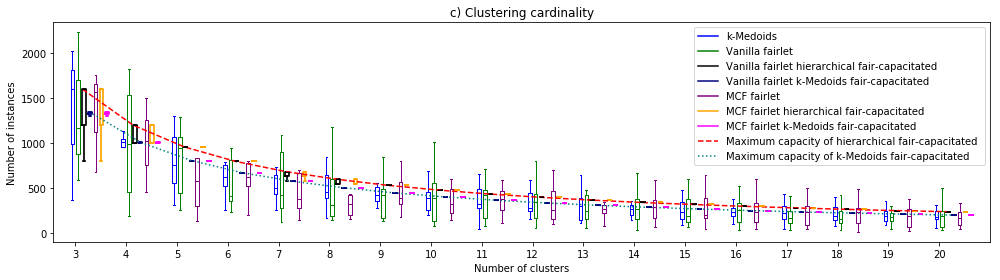

In [11]:
import matplotlib.pyplot as plt
import numpy as np

xtrue=np.array([i for i in range(1,19)])
xvalue=np.array([i for i in range(3,21)])
#for plot ideal capacity
xtrend = [1]
for i in range(1,18):
    xtrend.append(i*7+1)
    
xtrend_2 = [2]
for i in range(1,18):
    xtrend_2.append(i*7+2)
    
ticks = xvalue

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure(figsize=(14,4))

bpl = plt.boxplot(kmedoid_capacities, positions=np.array(range(len(kmedoid_capacities)))*7.0-0.4, sym='', widths=0.5)
#bpm = plt.boxplot(kmedoid_capacities, positions=np.array(range(len(kmedoid_capacities)))*7.0+0.4, sym='', widths=0.5)
bpr = plt.boxplot(vanilla_capacities, positions=np.array(range(len(vanilla_capacities)))*7.0+0.4, sym='', widths=0.5)
bpn = plt.boxplot(vanilla_capacitated_capacities, positions=np.array(range(len(vanilla_capacitated_capacities)))*7.0+1.2, sym='', widths=0.5, patch_artist=False)
bpk = plt.boxplot(vanilla_kmedoids_knapsack_capacities, positions=np.array(range(len(vanilla_kmedoids_knapsack_capacities)))*7.0+2.0, sym='', widths=0.5, patch_artist=False)
bpd = plt.boxplot(mcf_capacities, positions=np.array(range(len(mcf_capacities)))*7+2.8, sym='', widths=0.5)
bpe = plt.boxplot(mcf_capacitated_capacities, positions=np.array(range(len(mcf_capacitated_capacities)))*7.0+3.6, sym='', widths=0.5, patch_artist=False)
bpkm = plt.boxplot(mcf_kmedoid_knapsack_capacities, positions=np.array(range(len(mcf_kmedoid_knapsack_capacities)))*7.0+4.4, sym='', widths=0.5, patch_artist=False)

#set width of boxplot
linewidth=1.7
def set_box_size(bp,linewidth):
    for box in bp['boxes']:    
        box.set(linewidth=linewidth)
    for box in bp['whiskers']:    
        box.set(linewidth=linewidth)
    for box in bp['caps']:    
        box.set(linewidth=linewidth)

set_box_size(bpn,linewidth)
set_box_size(bpk,linewidth)
set_box_size(bpe,linewidth)
set_box_size(bpkm,linewidth)


set_box_color(bpl, 'blue') # colors are from http://colorbrewer2.org/
#set_box_color(bpm, 'navy')
set_box_color(bpr, 'green')
set_box_color(bpn, 'black')
set_box_color(bpk, 'navy')
set_box_color(bpd, 'purple')
set_box_color(bpe, 'orange')
set_box_color(bpkm, 'fuchsia')


# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='blue', label='k-Medoids')
#plt.plot([], c='navy', label='K-Medoids')
plt.plot([], c='green', label='Vanilla fairlet')
plt.plot([], c='black', label='Vanilla fairlet hierarchical fair-capacitated')
plt.plot([], c='navy', label='Vanilla fairlet k-Medoids fair-capacitated')
plt.plot([], c='purple', label='MCF fairlet')
plt.plot([], c='orange', label='MCF fairlet hierarchical fair-capacitated')
plt.plot([], c='fuchsia', label='MCF fairlet k-Medoids fair-capacitated')
plt.plot(xtrend,mcf_capacitated_ideal_capacity,linestyle='--',c='red',label='Maximum capacity of hierarchical fair-capacitated ')
plt.plot(xtrend_2,mcf_kmedoid_knapsack_ideal_capacity,linestyle='dotted',c='teal',label='Maximum capacity of k-Medoids fair-capacitated')

plt.legend()

plt.xticks(range(0, len(ticks) * 7, 7), ticks)
#plt.xticks(xtrue, ticks)
plt.xlim(-3, len(ticks)*7)
plt.title("c) Clustering cardinality")
plt.ylabel("Number of instances")
plt.xlabel("Number of clusters")
#plt.ylim(0, 8)
plt.tight_layout()
plt.savefig('boxcompare-oulad_new.pdf')

## Plot comparison graph

In [ ]:
%matplotlib inline
#%matplotlib notebook

from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(12,6))

ax = plt.subplot(1,1,1,projection='3d')
#ax.view_init(10,40)
#fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
vanilla_cost_dif = [(vanilla_costs[i]- unfair_costs[i])/unfair_costs[i] * 100  for i in range(len(unfair_costs))]
vanilla_hierarchical_cost_dif=[(vanilla_costs_hierarchical[i]-unfair_costs[i])/unfair_costs[i] * 100 for i in range(len(unfair_costs))]
vanilla_medoids_knapsack_cost_dif = [(vanilla_costs_kmedoids_knapsack[i]-unfair_costs[i])*100 for i in range(len(unfair_costs))]
mcf_cost_dif = [(mcf_costs[i]-unfair_costs[i])*100 for i in range(len(unfair_costs))]
mcf_hierarchical_cost_dif = [(mcf_costs_hclust[i]-unfair_costs[i])*100 for i in range(len(unfair_costs))]
medoids_knapsack_cost_dif = [(mcf_costs_kmedoid_knapsack[i]-unfair_costs[i])*100 for i in range(len(unfair_costs))]

vanilla_fair_dif = [(vanilla_balances[i]-unfair_balances[i]) for i in range(len(unfair_balances))]
vanilla_hierarchical_fair_dif = [(vanilla_balances_hierarchical[i]-unfair_balances[i]) for i in range(len(unfair_balances)) ]
vanilla_kmedoids_knapsack_fair_dif = [(vanilla_balances_kmedoids_knapsack[i]-unfair_balances[i]) for i in range(len(unfair_balances)) ]
mcf_fair_dif = [(mcf_balances[i]-unfair_balances[i]) for i in range(len(unfair_balances))]
mcf_hierarchical_fair_dif = [(mcf_balances_hclust[i]-unfair_balances[i]) for i in range(len(unfair_balances))]
mcf_medoids_knapsack_fair_dif = [(mcf_balances_kmedoid_knapsack[i]-unfair_balances[i]) for i in range(len(unfair_balances))]

x = [i for i in range(3,21)]

ax.plot(x,vanilla_cost_dif,vanilla_fair_dif, color='green',label='Vanilla Fairlet')
ax.plot(x,vanilla_hierarchical_cost_dif,vanilla_hierarchical_fair_dif, color='black',label='Vanilla Fairlet Hierarchical Fair-Capacitated')
ax.plot(x,vanilla_medoids_knapsack_cost_dif,vanilla_kmedoids_knapsack_fair_dif, color='lawngreen',label='Vanilla Fairlet k-Medoids-knapsack Fair-Capacitated')
ax.plot(x,mcf_cost_dif,mcf_fair_dif, color='purple',label='MFC Fairlet')
ax.plot(x,mcf_hierarchical_cost_dif,mcf_hierarchical_fair_dif, color='orange',label='MCF Fairlet Hierarchical Fair-Capacitated')
ax.plot(x,medoids_knapsack_cost_dif,mcf_medoids_knapsack_fair_dif, color='fuchsia',label='MCF Fairlet k-Medoids-knapsack Fair-Capacitated')

ax.set_xlabel('Number of clusters')
ax.set_ylabel('Clustering cost difference (%)')
ax.set_zlabel('Balance difference ')

yvalue = [-10,0,10,20,30,40,50]
ax.set_xticks(list(range(3, len(unfair_degrees)+3, 1))) 
ax.set_xticklabels(list(range(min(unfair_degrees), max(unfair_degrees)+1, 1)), fontsize=12)
plt.xticks(x, rotation=-15, va='center', ha='left')
#plt.yticks(yvalue, va='center', ha='right')
plt.legend()
plt.tight_layout()
plt.savefig('3Dplot-oulad-new.pdf')
plt.show()